In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ta = xr.open_dataset("/work/bb1153/b380883/TWP/TWP_3D_SAM_ta_20200130-20200228.nc").ta

In [3]:
pa = xr.open_dataset("/work/bb1153/b380883/DYAMOND2_SAM_9216x4608x74_10s.nc").PRES[0,:]
time = ta.time
lat = ta.lat
lon = ta.lon
pa

<xarray.DataArray 'PRES' (z: 74)>
array([1009.336   , 1004.43353 ,  999.2584  ,  993.7938  ,  988.0237  ,
        981.9329  ,  975.50574 ,  968.7269  ,  961.58154 ,  954.053   ,
        946.1244  ,  937.7809  ,  929.004   ,  919.77716 ,  910.08374 ,
        899.9048  ,  889.1674  ,  877.63367 ,  865.10114 ,  851.50055 ,
        836.76056 ,  820.8102  ,  803.5771  ,  784.98553 ,  764.4922  ,
        741.4946  ,  715.77997 ,  687.14526 ,  655.41315 ,  620.4463  ,
        583.3947  ,  546.89453 ,  512.3019  ,  479.52258 ,  448.47055 ,
        419.0621  ,  391.2218  ,  364.87982 ,  339.9746  ,  316.45218 ,
        294.26218 ,  273.36758 ,  253.72247 ,  235.28079 ,  218.00491 ,
        201.84352 ,  186.74599 ,  172.65804 ,  159.52457 ,  147.29106 ,
        135.90334 ,  125.309265,  115.467606,  106.33794 ,   97.881355,
         90.081955,   82.9104  ,   76.31564 ,   70.07209 ,   63.796314,
         57.35074 ,   50.82671 ,   44.32242 ,   37.948273,   31.829718,
         26.087635,   20.905254,   16.604362,   13.225542,   10.565154,
          8.465529,    6.804495,    5.48748 ,    4.440662], dtype=float32)
Coordinates:
  * z        (z) float32 20.0 61.2 104.9 151.2 ... 3.357e+04 3.507e+04 3.657e+04
    time     float32 20.02
Attributes:
    long_name:  Pressure
    units:      mb

In [4]:
ta.close()

In [5]:
pa_lat = pa * np.cos(np.deg2rad(lat))
pa_latlon = pa_lat.expand_dims(dim={"time":len(time)}, 
                               axis=0).assign_coords({"time":time})
pa_latlon = pa_latlon.expand_dims(dim={"lon":len(lon)}, 
                               axis=2).assign_coords({"lon":lon})
pa_latlon

<xarray.DataArray (time: 240, z: 74, lon: 256, lat: 256)>
array([[[[1005.5343   , 1005.5935   , 1005.6523   , ..., 1005.6523   ,
          1005.5935   , 1005.5343   ],
         [1005.5343   , 1005.5935   , 1005.6523   , ..., 1005.6523   ,
          1005.5935   , 1005.5343   ],
         [1005.5343   , 1005.5935   , 1005.6523   , ..., 1005.6523   ,
          1005.5935   , 1005.5343   ],
         ...,
         [1005.5343   , 1005.5935   , 1005.6523   , ..., 1005.6523   ,
          1005.5935   , 1005.5343   ],
         [1005.5343   , 1005.5935   , 1005.6523   , ..., 1005.6523   ,
          1005.5935   , 1005.5343   ],
         [1005.5343   , 1005.5935   , 1005.6523   , ..., 1005.6523   ,
          1005.5935   , 1005.5343   ]],

        [[1000.65027  , 1000.7092   , 1000.7677   , ..., 1000.7677   ,
          1000.7092   , 1000.65027  ],
         [1000.65027  , 1000.7092   , 1000.7677   , ..., 1000.7677   ,
          1000.7092   , 1000.65027  ],
         [1000.65027  , 1000.7092   , 1000.7677   , ..., 1000.7677   ,
          1000.7092   , 1000.65027  ],
...
         [   5.4668107,    5.4671326,    5.4674525, ...,    5.4674525,
             5.4671326,    5.4668107],
         [   5.4668107,    5.4671326,    5.4674525, ...,    5.4674525,
             5.4671326,    5.4668107],
         [   5.4668107,    5.4671326,    5.4674525, ...,    5.4674525,
             5.4671326,    5.4668107]],

        [[   4.4239364,    4.4241967,    4.4244556, ...,    4.4244556,
             4.4241967,    4.4239364],
         [   4.4239364,    4.4241967,    4.4244556, ...,    4.4244556,
             4.4241967,    4.4239364],
         [   4.4239364,    4.4241967,    4.4244556, ...,    4.4244556,
             4.4241967,    4.4239364],
         ...,
         [   4.4239364,    4.4241967,    4.4244556, ...,    4.4244556,
             4.4241967,    4.4239364],
         [   4.4239364,    4.4241967,    4.4244556, ...,    4.4244556,
             4.4241967,    4.4239364],
         [   4.4239364,    4.4241967,    4.4244556, ...,    4.4244556,
             4.4241967,    4.4239364]]]], dtype=float32)
Coordinates:
  * z        (z) float32 20.0 61.2 104.9 151.2 ... 3.357e+04 3.507e+04 3.657e+04
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-28T21:00:00
  * lat      (lat) float32 -4.974 -4.936 -4.897 -4.858 ... 4.897 4.936 4.974
  * lon      (lon) float32 143.0 143.0 143.1 143.1 ... 152.9 152.9 152.9 153.0

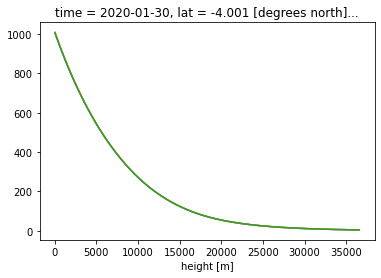

In [5]:
pa_latlon.sel(lat=4, method="nearest").sel(lon=144, method="nearest").isel(time=0).plot()
pa_latlon.sel(lat=0, method="nearest").sel(lon=147, method="nearest").isel(time=0).plot()
pa_latlon.sel(lat=-4, method="nearest").sel(lon=147, method="nearest").isel(time=0).plot()
plt.show()

In [6]:
pa_latlon = (pa_latlon*100)
pa_latlon = pa_latlon.assign_attrs({"long_name":"atmospheric pressure","units":"Pa"})
pa_latlon

<xarray.DataArray (time: 240, z: 74, lon: 256, lat: 256)>
array([[[[100553.43   , 100559.35   , 100565.23   , ..., 100565.23   ,
          100559.35   , 100553.43   ],
         [100553.43   , 100559.35   , 100565.23   , ..., 100565.23   ,
          100559.35   , 100553.43   ],
         [100553.43   , 100559.35   , 100565.23   , ..., 100565.23   ,
          100559.35   , 100553.43   ],
         ...,
         [100553.43   , 100559.35   , 100565.23   , ..., 100565.23   ,
          100559.35   , 100553.43   ],
         [100553.43   , 100559.35   , 100565.23   , ..., 100565.23   ,
          100559.35   , 100553.43   ],
         [100553.43   , 100559.35   , 100565.23   , ..., 100565.23   ,
          100559.35   , 100553.43   ]],

        [[100065.02   , 100070.92   , 100076.77   , ..., 100076.77   ,
          100070.92   , 100065.02   ],
         [100065.02   , 100070.92   , 100076.77   , ..., 100076.77   ,
          100070.92   , 100065.02   ],
         [100065.02   , 100070.92   , 100076.77   , ..., 100076.77   ,
          100070.92   , 100065.02   ],
...
         [   546.6811 ,    546.71326,    546.74524, ...,    546.74524,
             546.71326,    546.6811 ],
         [   546.6811 ,    546.71326,    546.74524, ...,    546.74524,
             546.71326,    546.6811 ],
         [   546.6811 ,    546.71326,    546.74524, ...,    546.74524,
             546.71326,    546.6811 ]],

        [[   442.39365,    442.41968,    442.44556, ...,    442.44556,
             442.41968,    442.39365],
         [   442.39365,    442.41968,    442.44556, ...,    442.44556,
             442.41968,    442.39365],
         [   442.39365,    442.41968,    442.44556, ...,    442.44556,
             442.41968,    442.39365],
         ...,
         [   442.39365,    442.41968,    442.44556, ...,    442.44556,
             442.41968,    442.39365],
         [   442.39365,    442.41968,    442.44556, ...,    442.44556,
             442.41968,    442.39365],
         [   442.39365,    442.41968,    442.44556, ...,    442.44556,
             442.41968,    442.39365]]]], dtype=float32)
Coordinates:
  * z        (z) float32 20.0 61.2 104.9 151.2 ... 3.357e+04 3.507e+04 3.657e+04
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-28T21:00:00
  * lat      (lat) float32 -4.974 -4.936 -4.897 -4.858 ... 4.897 4.936 4.974
  * lon      (lon) float32 143.0 143.0 143.1 143.1 ... 152.9 152.9 152.9 153.0
Attributes:
    long_name:  atmospheric pressure
    units:      Pa

In [7]:
pa_latlon = xr.Dataset({"pa":pa_latlon}, attrs={"long_name":"atmospheric pressure","units":"Pa"})
pa_latlon

<xarray.Dataset>
Dimensions:  (z: 74, time: 240, lat: 256, lon: 256)
Coordinates:
  * z        (z) float32 20.0 61.2 104.9 151.2 ... 3.357e+04 3.507e+04 3.657e+04
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-28T21:00:00
  * lat      (lat) float32 -4.974 -4.936 -4.897 -4.858 ... 4.897 4.936 4.974
  * lon      (lon) float32 143.0 143.0 143.1 143.1 ... 152.9 152.9 152.9 153.0
Data variables:
    pa       (time, z, lon, lat) float32 1.006e+05 1.006e+05 ... 442.4 442.4
Attributes:
    long_name:  atmospheric pressure
    units:      Pa

In [8]:
pa_latlon.to_netcdf("/work/bb1153/b380883/TWP/TWP_3D_SAM_pa_20200130-20200228.nc")